# Coding Applications in Medicine: Data Science - Other Statistical Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import pearsonr
from scipy.stats.contingency import odds_ratio
from scipy.stats.contingency import relative_risk

In [2]:
# Load the insurance data.
insuranceDF = pd.read_csv("data/insurance.csv")
insuranceDF

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Odds Ratio

The odds ratios are typically used in case-control studies. 

Suppose we are examining a group of individuals to see if individuals who smoke are more likely to be a male. (Start with smokers/nonsmokers and looking back to compare the frequency of male/female).

In [3]:
# Create the contingency table.
smokerBySexDF = insuranceDF[["sex", "smoker"]].copy()
smokerBySexDF["is male"] = (smokerBySexDF["sex"] == "male").astype(int)
smokerBySexContingency = pd.crosstab(smokerBySexDF["is male"], smokerBySexDF["smoker"])

smokerBySexContingency

smoker,no,yes
is male,,
0,547,115
1,517,159


In [4]:
# Odds Ratio.
smokerBySexOddsRatio = odds_ratio(smokerBySexContingency)
smokerBySexOddsRatio

OddsRatioResult(statistic=1.462422262357571)

In [5]:
# Confidence Interval (95%).
smokerBySexOddsRatio.confidence_interval(0.95)

ConfidenceInterval(low=1.1091022887207116, high=1.9323629740891681)

## Relative Risk

The relative risks are typically used in cohort studies. 

Suppose we are examining a group of individuals at a given time to see if smoking increases the risk for a high medical insurance charge. (Start with smoking/nonsmoking and looking forward to compare the insurance charges).

In [6]:
# Create the contingency table.
chargeBySmokerDF = insuranceDF[["age", "charges"]].copy()
chargeBySmokerDF["is old"] = (chargeBySmokerDF["age"] >= 50).astype(int)
chargeBySmokerDF["high charge"] = (chargeBySmokerDF["charges"] > 10000)


chargeBySmokerContingency = pd.crosstab(chargeBySmokerDF["is old"], chargeBySmokerDF["high charge"])

chargeBySmokerContingency

high charge,False,True
is old,,
0,667,286
1,45,340


In [7]:
# Unfortunately, the relative risk function does not take a contingency table as in input.
exposed_cases = chargeBySmokerContingency[True][1]
exposed_total = chargeBySmokerContingency.sum(axis=1)[1]
control_cases = chargeBySmokerContingency[True][0]
control_total = chargeBySmokerContingency.sum(axis=1)[0]

In [8]:
# Relative Risk.
chargeBySmokerRelRisk = relative_risk(exposed_cases, exposed_total, control_cases, control_total)
chargeBySmokerRelRisk

RelativeRiskResult(relative_risk=2.9426936699663973, exposed_cases=340, exposed_total=385, control_cases=286, control_total=953)

In [9]:
# Confidence Interval (95%).
chargeBySmokerRelRisk.confidence_interval(0.95)

ConfidenceInterval(low=2.6532396335612285, high=3.2637255699506613)

## Pearson Correlation Coefficient

Recall that the Pearson correlation coefficient is used to check for linear correlation between two variables.

In the following example, we will examine the correlation between bmi and the medical insurance charges.

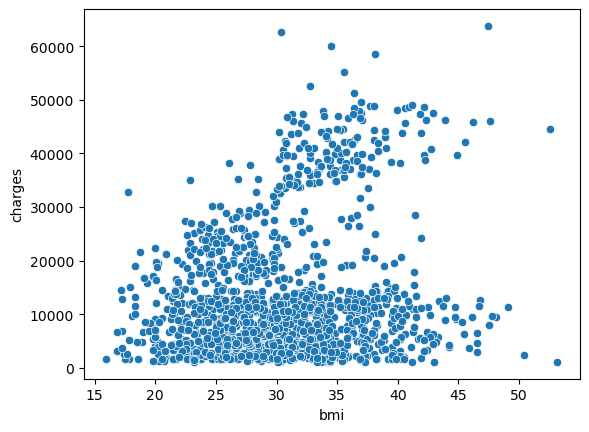

In [10]:
# Graph of the data.
sns.scatterplot(data=insuranceDF, x="bmi", y="charges")
plt.show();

In [11]:
# Pearson correlation coefficient.
insuranceChargeBmiPearsonR = pearsonr(insuranceDF["bmi"], 
                                      insuranceDF["charges"])
insuranceChargeBmiPearsonR

PearsonRResult(statistic=0.19834096883362926, pvalue=2.4590855351164275e-13)

In [12]:
# Confidence Interval (95%).
insuranceChargeBmiPearsonR.confidence_interval(0.95)

ConfidenceInterval(low=0.14630517097537107, high=0.2492821956677457)

For more information, check the following:
- User Guide: https://docs.scipy.org/doc/scipy/tutorial/stats.html
- API Reference: https://docs.scipy.org/doc/scipy/reference/stats.html

**Source:**


Module adapted from Kaggle: https://www.kaggle.com/code/mariapushkareva/medical-insurance-cost-with-linear-regression/notebook

Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets